In [1]:
# Mengimpor library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Mengimpor dataset
dataset = pd.read_csv('Data_bank_churn.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [2]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [3]:
# Mengonversi data kategori jenis kelamin menjadi numerik
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder = LabelEncoder()
X[:, 2] = labelencoder.fit_transform(X[:, 2])

# Membuat dummy variable untuk kolom negara
# apa itu dummy variabel? baca di penjelasan
columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(columnTransformer.fit_transform(X), dtype = float)

# Menghilangkan 1 dummy variabel di kolom negara
X = X[:, 1:]

# Membagi data ke test dan training set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [4]:
print(X_test)

[[ 1.75486502 -0.57369368 -0.55204276 ...  0.64259497  0.9687384
   1.61085707]
 [-0.5698444  -0.57369368 -1.31490297 ...  0.64259497 -1.03227043
   0.49587037]
 [-0.5698444   1.74309049  0.57162971 ...  0.64259497  0.9687384
  -0.42478674]
 ...
 [-0.5698444   1.74309049 -0.74791227 ...  0.64259497 -1.03227043
   0.71888467]
 [ 1.75486502 -0.57369368 -0.00566991 ...  0.64259497  0.9687384
  -1.54507805]
 [ 1.75486502 -0.57369368 -0.79945688 ...  0.64259497 -1.03227043
   1.61255917]]


In [5]:
# Mengimpor library Keras dan turunannya
# Sekarang menggunakan TensorFlow 2.0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Inisialisasi ANN
MesinKlasifikasi = Sequential()

# Menambah input layer dan hidden layer pertama
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))
# Menambah hidden layer kedua
MesinKlasifikasi.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
# Menambah output layer
MesinKlasifikasi.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Meenjalankan ANN
MesinKlasifikasi.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting ANN ke training set
MesinKlasifikasi.fit(X_train, y_train, batch_size = 10, epochs = 100)

# Memprediksi hasil test set
y_pred = MesinKlasifikasi.predict(X_test)
y_pred = (y_pred > 0.5)

# Membuat confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

C:\Users\ROG ZEPHYRUS M16\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7987 - loss: 0.5620
Epoch 2/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 980us/step - accuracy: 0.7954 - loss: 0.4318
Epoch 3/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7981 - loss: 0.4237
Epoch 4/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8044 - loss: 0.4355
Epoch 5/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8191 - loss: 0.4253
Epoch 6/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8219 - loss: 0.4281
Epoch 7/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8288 - loss: 0.4182
Epoch 8/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8257 - loss: 0.4175
Epoch 9/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8342 - loss: 0.4112
Epoch 10/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8295 - loss: 0.4155
Epoch 11/100
800/800 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8332 - loss: 0.4101
Epoch 12/100
800/800 ━━━━━━━━━━━━━━━━━━

Confusion Matrix:
[[1549   46]
 [ 269  136]]
Akurasi model: 84.25%
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91      1595
           1       0.75      0.34      0.46       405

    accuracy                           0.84      2000
   macro avg       0.80      0.65      0.69      2000
weighted avg       0.83      0.84      0.82      2000



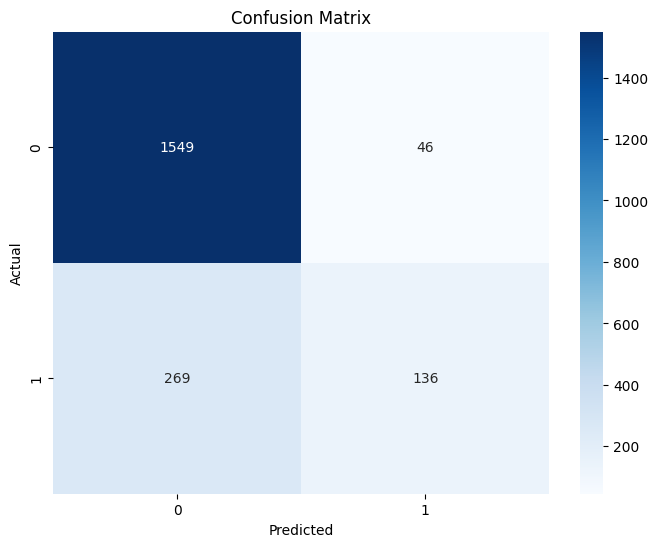

In [6]:
# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

# Menghitung akurasi model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Akurasi model: {accuracy * 100:.2f}%")

# Evaluasi model dengan classification report
from sklearn.metrics import classification_report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Menampilkan visualisasi confusion matrix
import seaborn as sns
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()